In [ ]:
pip install torch


In [4]:
import torch
torch.__version__

'2.0.1+cu118'

In [5]:
! [ -e /content ] && pip install -Uqq fastai

In [6]:
import fastai
fastai.__version__

'2.7.12'

In [7]:
from fastai.tabular.all import *

In [10]:
path=Path('drive/MyDrive/flowers')
path.ls()

(#1) [Path('drive/MyDrive/flowers/flowers')]

In [12]:
from fastai.vision.all import *


In [13]:
dls = ImageDataLoaders.from_folder(
    path,
    item_tfms=RandomResizedCrop(128, min_scale=0.35),
    batch_tfms=[Normalize.from_stats(*imagenet_stats)],
    valid_pct=0.15
)

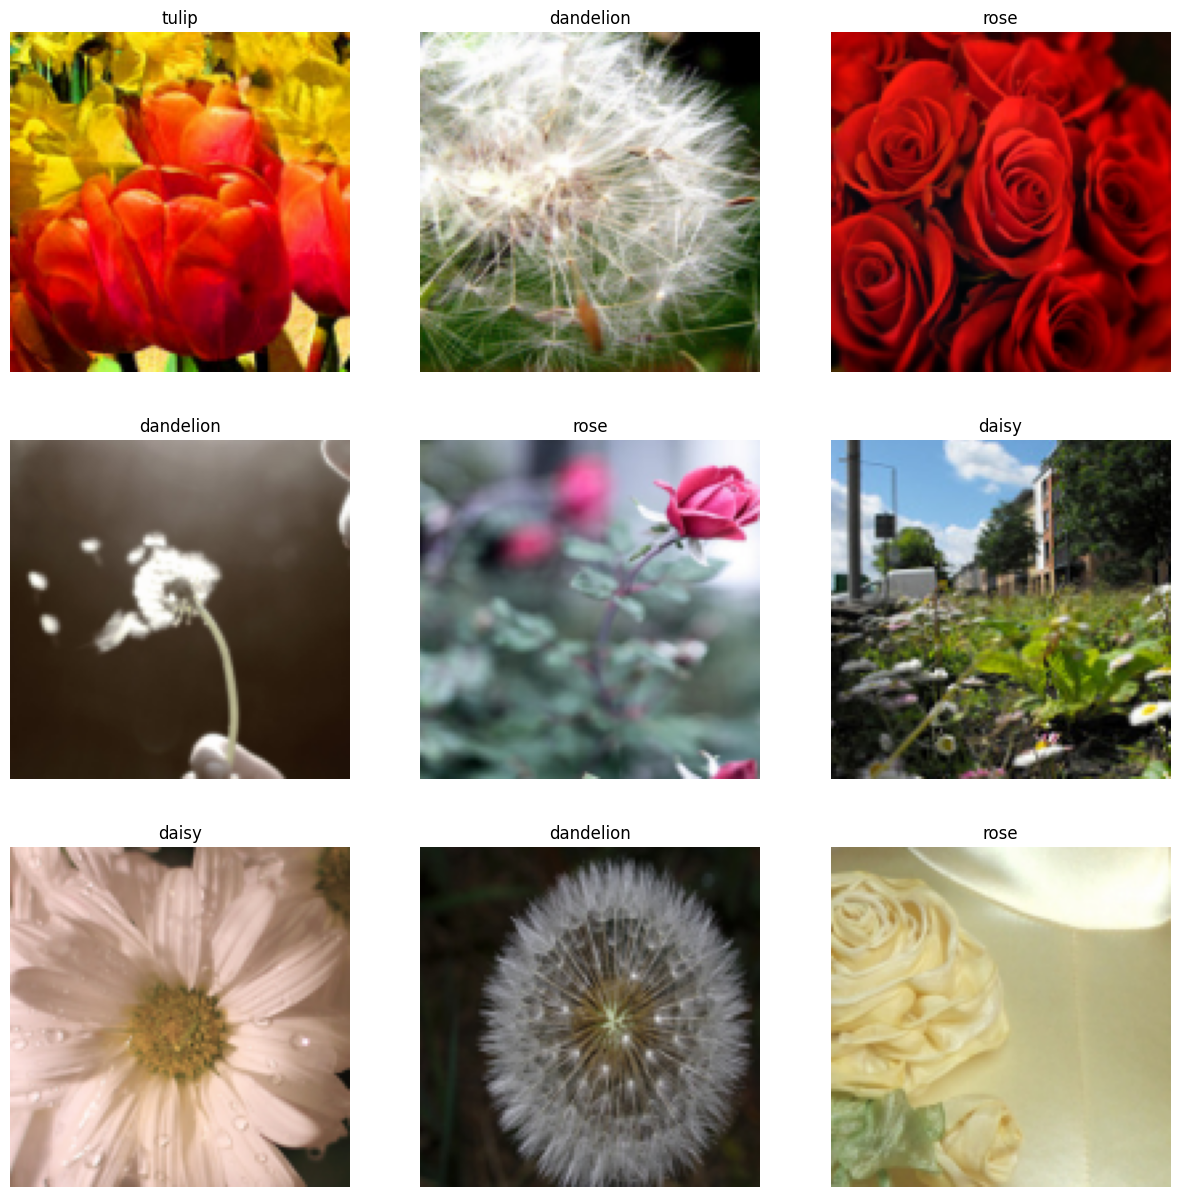

In [14]:
dls.show_batch(figsize=(15,15))

In [15]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

In [17]:
epochs = 5
learn.fine_tune(epochs)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.248240,0.713477,0.217593,0.782407,09:25


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.570517,0.474066,0.155864,0.844136,12:32
1,0.461144,0.488739,0.149691,0.850309,12:05
2,0.305570,0.397468,0.120370,0.879630,11:56
3,0.204177,0.403793,0.120370,0.879630,11:53
4,0.155806,0.382541,0.117284,0.882716,11:56


In [18]:
learn.summary()

Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 64   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 32 x 32   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

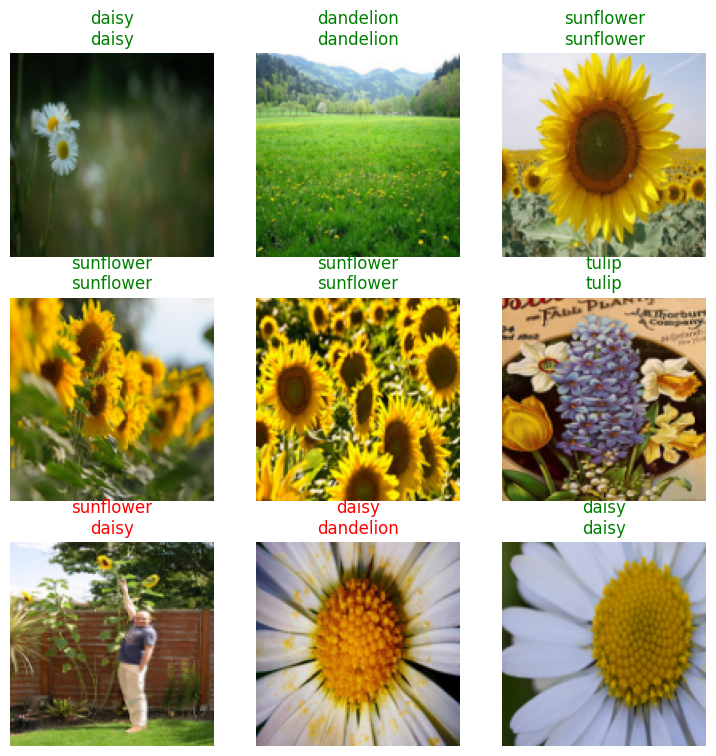

In [19]:
learn.show_results()

In [27]:
interp = Interpretation.from_learner(learn)

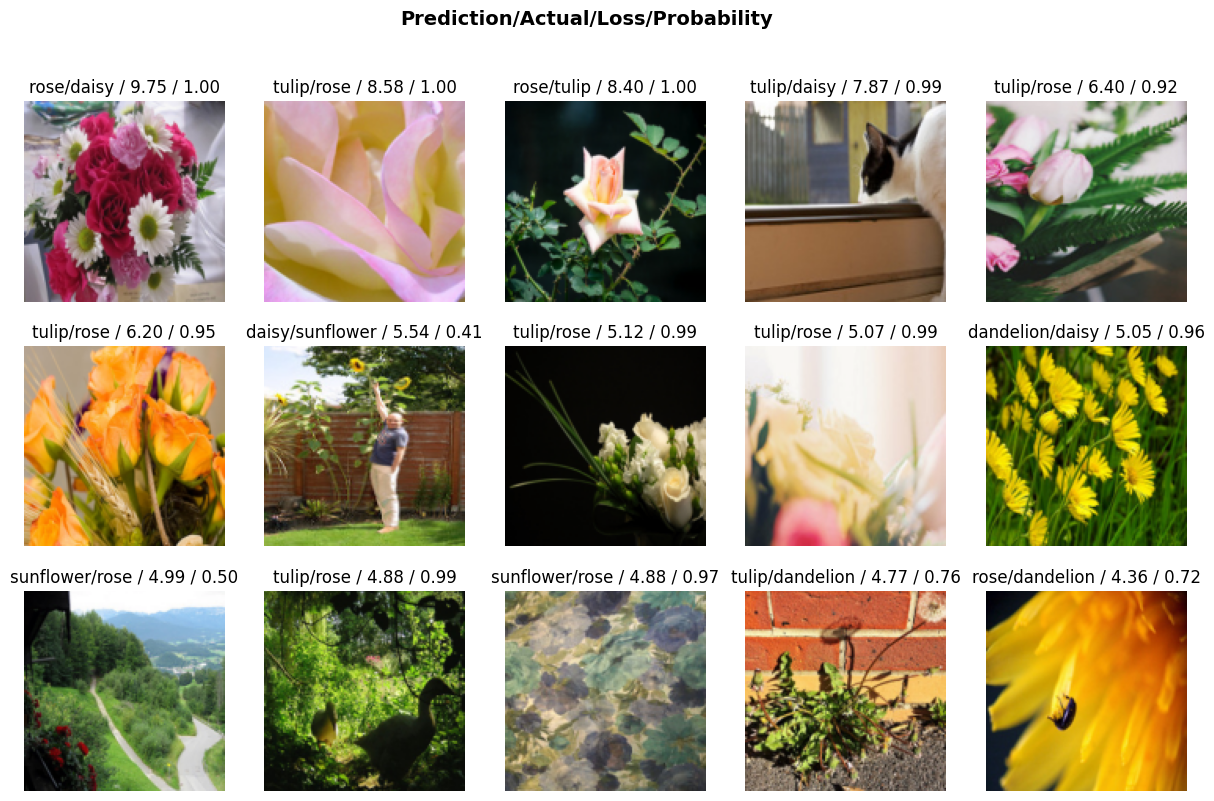

In [30]:
interp.plot_top_losses(k=15)